<a href="https://colab.research.google.com/github/ochouchene/-Data-Gathering-with-API-/blob/main/Unsupervised_Learning_Clustering_Checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage


data = pd.read_csv("Credit_card_dataset.csv")

In [ ]:
print(data.head())
print(data.info())
print(data.describe())

  CUST_ID  BALANCE_FREQUENCY  PURCHASES     PAYMENTS  CREDIT_LIMIT  \
0  C10001           0.818182      95.40   201.802084        1000.0   
1  C10002           0.909091       0.00  4103.032597        7000.0   
2  C10003           1.000000     773.17   622.066742        7500.0   
3  C10004           0.636364    1499.00     0.000000        7500.0   
4  C10005           1.000000      16.00   678.334763        1200.0   

   CASH_ADVANCE  
0      0.000000  
1   6442.945483  
2      0.000000  
3    205.788017  
4      0.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUST_ID            8950 non-null   object 
 1   BALANCE_FREQUENCY  8950 non-null   float64
 2   PURCHASES          8950 non-null   float64
 3   PAYMENTS           8950 non-null   float64
 4   CREDIT_LIMIT       8949 non-null   float64
 5   CASH_ADVANCE       8950 

In [ ]:
print(data.isnull().sum())

CUST_ID              0
BALANCE_FREQUENCY    0
PURCHASES            0
PAYMENTS             0
CREDIT_LIMIT         1
CASH_ADVANCE         0
dtype: int64


In [ ]:
numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

In [ ]:
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    data = data[(data[col] >= lower) & (data[col] <= upper)]

In [ ]:
data_cluster = data.drop(columns=['CUST_ID'])

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_cluster)

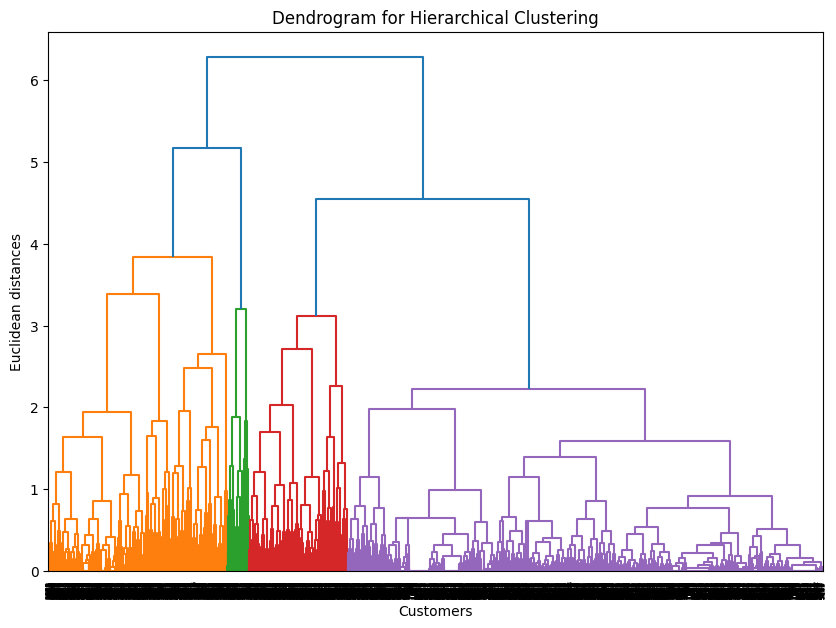

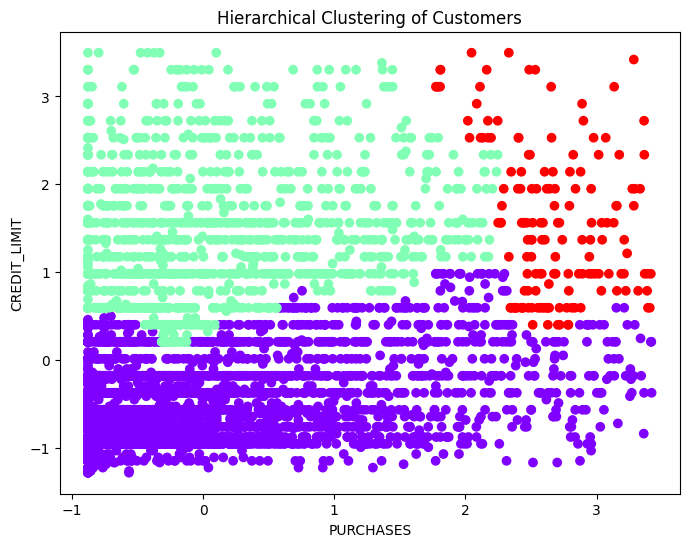

In [ ]:
features = ['PURCHASES', 'CREDIT_LIMIT']
X_hier = scaled_data[:, [list(data_cluster.columns).index(f) for f in features]]


linked = linkage(X_hier, method='complete')


plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.show()


hc = AgglomerativeClustering(n_clusters=3, linkage='complete')
labels_hc = hc.fit_predict(X_hier)


plt.figure(figsize=(8, 6))
plt.scatter(X_hier[:,0], X_hier[:,1], c=labels_hc, cmap='rainbow')
plt.xlabel('PURCHASES')
plt.ylabel('CREDIT_LIMIT')
plt.title('Hierarchical Clustering of Customers')
plt.show()

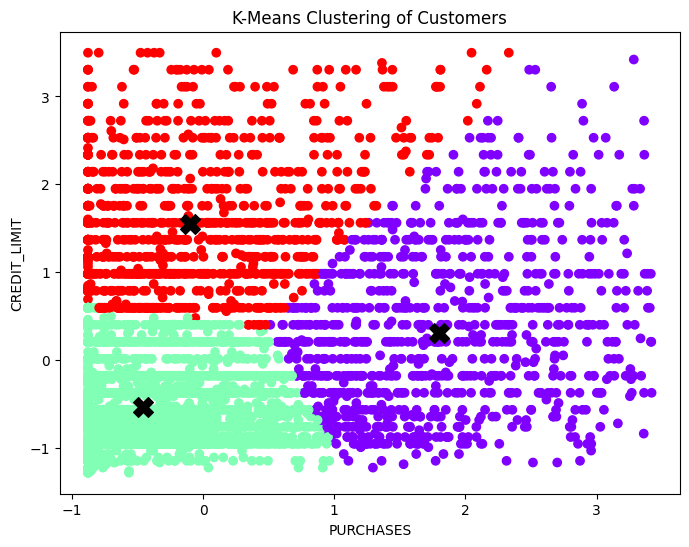

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels_km = kmeans.fit_predict(X_hier)
plt.figure(figsize=(8, 6))
plt.scatter(X_hier[:,0], X_hier[:,1], c=labels_km, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='black', marker='X')
plt.xlabel('PURCHASES')
plt.ylabel('CREDIT_LIMIT')
plt.title('K-Means Clustering of Customers')
plt.show()

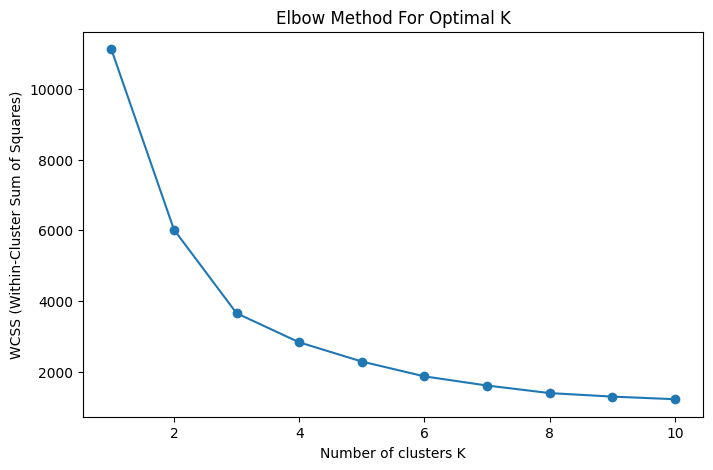

In [ ]:
wcss = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_hier)
    wcss.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11), wcss, marker='o')
plt.xlabel('Number of clusters K')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method For Optimal K')
plt.show()

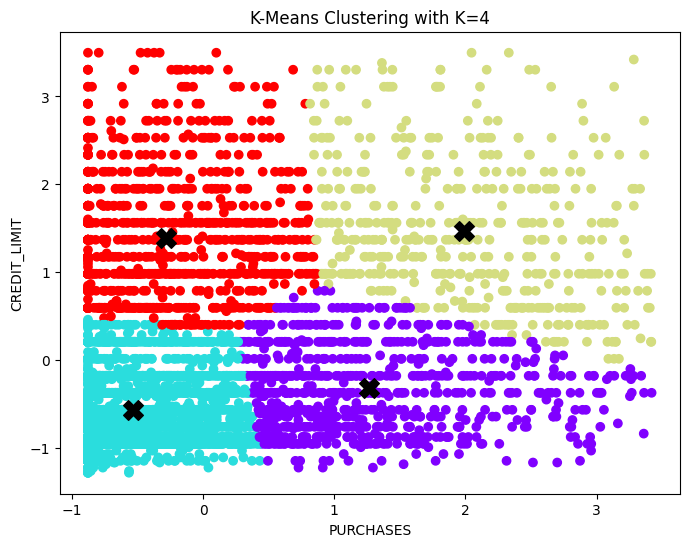

In [ ]:
k_opt = 4
kmeans_opt = KMeans(n_clusters=k_opt, random_state=42)
labels_opt = kmeans_opt.fit_predict(X_hier)

plt.figure(figsize=(8,6))
plt.scatter(X_hier[:,0], X_hier[:,1], c=labels_opt, cmap='rainbow')
plt.scatter(kmeans_opt.cluster_centers_[:,0], kmeans_opt.cluster_centers_[:,1], s=200, c='black', marker='X')
plt.xlabel('PURCHASES')
plt.ylabel('CREDIT_LIMIT')
plt.title(f'K-Means Clustering with K={k_opt}')
plt.show()

High purchasers & high credit limit → premium customers

Low purchasers & low credit limit → occasional or low-value customers

High credit limit but low purchases → potential for targeted marketing

Both Hierarchical and KMeans give similar insights, but KMeans scales better for larger datasets.